In [2]:
#Author:Bhishma Dedhia

import torch
import torch.nn as nn
import os
import sys
import numpy as np
import argparse
import yaml
sys.path.append('../dsc/')
from dsc_model import DSCModel
from bert2bert import Bert2BertSynCtrl
from transformers import BertConfig
%load_ext autoreload
%autoreload 2

In [4]:
datapath = '../datasets/synthetic_data1/'
config_path = '../exp_configs/synthetic1/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = '../logs_dir/synthetic1/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 0
interv_time = 22
lowrank = False
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = False,
                    classes=None)


In [ ]:
#model_path = '../logs_dir/synthetic1/pretrain/model.pth'
dscmodel.load_model_from_checkpoint(model_path)
dscmodel.fit(interv_time)

Modifying K
Fitting model on target unit
Iteration:0	Loss_mean:0.4288100302219391	Loss_std:0.0
Iteration:100	Loss_mean:0.043327642492949965	Loss_std:0.07264931238363878
Iteration:200	Loss_mean:0.002640431242662089	Loss_std:0.0024644677901973847
Iteration:300	Loss_mean:0.0015620236853283133	Loss_std:0.0013588609795172895
Iteration:400	Loss_mean:0.0011767265609523747	Loss_std:0.0012462176592477326
Iteration:500	Loss_mean:0.00160954115522145	Loss_std:0.0015756714932929755
Iteration:600	Loss_mean:0.0012153421631342098	Loss_std:0.0012363186582966112
Iteration:700	Loss_mean:0.001288798181230959	Loss_std:0.0013122481455611751
Iteration:800	Loss_mean:0.0006914247825443453	Loss_std:0.0005000276335103972
Iteration:900	Loss_mean:0.001009640457778005	Loss_std:0.0010360756226673517


In [26]:
model_path = '../logs_dir/synthetic1/finetune/model.pth'
dscmodel.load_model_from_checkpoint(model_path)
op = dscmodel.predict(interv_time)

51


In [27]:
#MSE
meanmatrix = np.load(datapath+'mean1.npy')
test_mean = meanmatrix[0,interv_time:]
pred_mean=op[interv_time:]
print(np.sqrt(np.mean((pred_mean - test_mean)**2)))
print(pred_mean,test_mean)

0.9163981739339312
[22.061865 15.880838 19.19352  17.283714 20.290255 16.985134 17.319878
 20.182495] [21.54488158 17.39623956 20.47738525 16.76257919 20.47738525 16.40398544
 17.39623956 21.54488158]


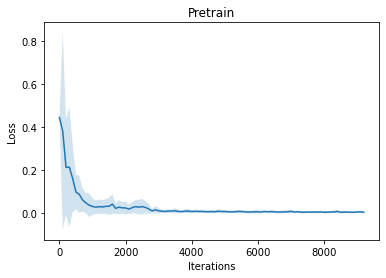

In [15]:
from matplotlib import pyplot as plt
path = '../logs_dir/synthetic1/pretrain/model.pth'

checkpoint = torch.load(path)
logs = checkpoint['logs']
iter_number = []
mean_run = []
std_run = []
for key, value in logs.items():
    iter_number.append(int(key))
    mean_run.append(value['train_loss_mean'])
    std_run.append(value['train_loss_std'])
fig, ax = plt.subplots()
mean_run = np.asarray(mean_run)
std_run = np.asarray(std_run)
ax.plot(iter_number, mean_run, '-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Pretrain')
ax.fill_between(iter_number, mean_run - std_run,mean_run + std_run, alpha=0.2)

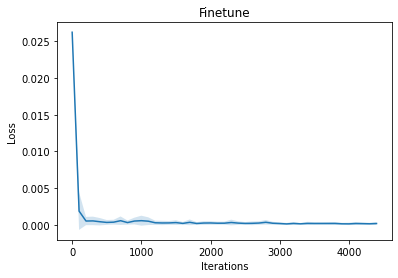

In [2]:
from matplotlib import pyplot as plt
path = '../logs_dir/synthetic1/finetune/model.pth'

checkpoint = torch.load(path)
logs = checkpoint['logs']
iter_number = []
mean_run = []
std_run = []
for key, value in logs.items():
    iter_number.append(int(key))
    mean_run.append(value['train_loss_mean'])
    std_run.append(value['train_loss_std'])
fig, ax = plt.subplots()
mean_run = np.asarray(mean_run)
std_run = np.asarray(std_run)
ax.plot(iter_number, mean_run, '-')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Finetune')
ax.fill_between(iter_number, mean_run - std_run,mean_run + std_run, alpha=0.2)